In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
train_data = pd.read_csv('../Auto Pipeline/10_weekly_train.csv')
test_data = pd.read_csv('../Auto Pipeline/10_weekly_test.csv')
train_data.drop(["Date"],1, inplace = True)
test_data.drop(["Date"],1, inplace = True)

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_mov = train_data["movement"]
test_mov = test_data["movement"]
col_name = train_data.drop(["movement"],1).columns
train_data[col_name] = scaler.fit_transform(train_data.drop(["movement"],1))
test_data[col_name] = scaler.fit_transform(test_data.drop(["movement"],1))
train_data["movement"] = train_mov
test_data["movement"] = test_mov

In [17]:
label_train = train_data["movement"].astype(int)
train = train_data.drop(["Close (t)","movement"],1)
label_test = test_data["movement"].astype(int)
test = test_data.drop(["Close (t)","movement"],1)

In [18]:
knn = neighbors.KNeighborsClassifier(n_neighbors = 41, metric='euclidean')
knn_model = knn.fit(train, label_train)

In [19]:
def evaluate_model(model, test, label_test):
    predicted = model.predict(test)
    print("accuracy:", str(accuracy_score(label_test, predicted)))
    
    print("precision:", str(precision_score(label_test, predicted, average='weighted')))

    print("recall:", str(recall_score(label_test, predicted, average='weighted')))
   
    print("f1", str(f1_score(label_test, predicted, average='weighted')))
    
    print("metrics.roc_auc_score", str(roc_auc_score(label_test, predicted, average='weighted')))

    plot_confusion_matrix(model, test, label_test,
                      display_labels=list(set(label_test)),
                      cmap=plt.cm.Blues)
    
    classification = classification_report(label_test, predicted)
    print(classification)

accuracy: 0.5536723163841808
precision: 0.5124210950731389
recall: 0.5536723163841808
f1 0.5176168619772877
metrics.roc_auc_score 0.4898089439428932
              precision    recall  f1-score   support

           0       0.37      0.20      0.26       275
           1       0.61      0.78      0.68       433

    accuracy                           0.55       708
   macro avg       0.49      0.49      0.47       708
weighted avg       0.51      0.55      0.52       708



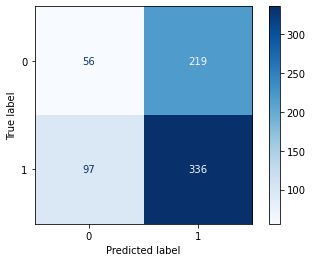

In [20]:
evaluate_model(knn_model, test, label_test)